In [7]:
import pandas as pd
from scipy.stats import ttest_ind

#import the pre-processed data
data = pd.read_excel('questionnaire.xlsx', index_col = 0)

#turn year of birth to age, and split age range
data['Age'] = 2023 - data['BirthYear']
mean_age = data['Age'].mean()
print(mean_age)
std_age = data['Age'].std()
print(std_age)
data['Age_Bins']=pd.cut(x=data['Age'], bins=[0, 20, 30, 40,50, 60,70,80,100],right=False)
data = data.drop(['BirthYear', 'Age'], axis = 1)

#correct the error of question 20 based on question 19
data.loc[data['Location']==5, 'CityType'] = 6 #error correction

#classify the variables
variables = list(data.columns)
length = len(variables)            
needed = variables[0:length-5]  #need test
demog = variables[length-5: length] #the demographical factors


33.506024096385545
11.103035724165494


In [8]:

# frequency and percentage of demographical viables
for i in demog:
    df1 = data[i].value_counts() #frequency
    df1 = df1.sort_index()
    df2 = data[i].value_counts(normalize =True) #percentage
    df2 = df2.sort_index()
    df2 = df2.apply(lambda x:format(x, '.1%'))
    # print(type(df1))
    # print(df1)
    # print(df2)
    df3 = pd.concat([df1, df2], axis=1)
    print(df3, sep="\t")

  Gender Gender
0     26  31.3%
1     57  68.7%
  Education Education
1         2      2.4%
2         4      4.8%
3        11     13.3%
4        45     54.2%
5        21     25.3%
  Location Location
1       17    20.5%
2       36    43.4%
3        8     9.6%
4        4     4.8%
5       18    21.7%
  CityType CityType
1       12    14.5%
2       29    34.9%
3        5     6.0%
4       13    15.7%
5        6     7.2%
6       18    21.7%
          Age_Bins Age_Bins
[0, 20)          3     3.6%
[20, 30)        35    42.2%
[30, 40)        24    28.9%
[40, 50)         9    10.8%
[50, 60)        11    13.3%
[60, 70)         1     1.2%
[70, 80)         0     0.0%
[80, 100)        0     0.0%


In [9]:
record = {}
# frequency and percentage of tested viables
for i in needed:
    df1 = data[i].value_counts() #frequency
    df1 = df1.sort_index()
    df2 = data[i].value_counts(normalize =True) #percentage
    df2 = df2.sort_index()
    record[i] = df2
    df2 = df2.apply(lambda x:format(x, '.1%'))
    # print(type(df1))
    # print(df1)
    # print(df2)   
    df3 = pd.concat([df1, df2], axis=1)
    print(df3, sep="\t")

  Y_Encount Y_Encount
1        17     20.5%
2        16     19.3%
3        23     27.7%
4        13     15.7%
5        14     16.9%
  YE_ToWhom YE_ToWhom
1         9     10.8%
2         1      1.2%
3        73     88.0%
  YE_Emotion YE_Emotion
1         26      31.3%
2          4       4.8%
3          4       4.8%
4         31      37.3%
5         13      15.7%
6          5       6.0%
  Y_Trigger Y_Trigger
1        76     91.6%
2         7      8.4%
  Y_DeletePost Y_DeletePost
1           10        12.0%
2            6         7.2%
3            9        10.8%
4           15        18.1%
5           43        51.8%
  Y_Mute Y_Mute
1      4   4.8%
2      7   8.4%
3      4   4.8%
4     15  18.1%
5     53  63.9%
  Y_DeleteAccount Y_DeleteAccount
1               5            6.0%
2               7            8.4%
3              14           16.9%
4              12           14.5%
5              45           54.2%
  S_Encount S_Encount
1        20     24.1%
2        15     18.1%
3        17 

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator
def to_percent(temp, position):
    return '%1.0f'%(100 * temp) + '%'
def plot_stackbar(Slist, measures, columnlist):
    newdf = pd.concat([record[i] for i in Slist], axis=1)
    # print(newdf)
    trans = newdf.T
    # print(trans)
    trans.index = measures
    trans.columns = columnlist
    # print(trans)
    # 显示数据标签

    ax = trans.plot.barh(stacked=True, figsize=(15, 3), zorder=3)    
    plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))
    # if title:
    #     plt.title(title)
    ax.legend(loc = 8, bbox_to_anchor=(0.4, -0.2), ncol = len(columnlist))
    plt.tick_params(top=False,bottom=False,left=False,right=False, labeltop=True, labelbottom=False)
    ax.xaxis.set_major_locator(MultipleLocator(0.1)) 
    ax.spines['top'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    ax.spines['bottom'].set_visible(False) 
    plt.grid(axis = 'x', zorder=0, alpha = 0.3)
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt=lambda x: '{:.1f}%'.format(x * 100) if x > 0.03 else '')


In [19]:
def plot_bar(SE_list, columns, title="", num = 0):
    length = len(SE_list)
    newdf = pd.concat([record[i] for i in SE_list], axis=1)
    newdf.columns = columns
    trans = newdf.loc[1]
    ax = trans.plot.bar(figsize=(12, 3), zorder=3, width = 0.1, color=plt.cm.Paired(range(length)))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    plt.tick_params(top=False,bottom=False,left=False,right=False)
    ax.spines['top'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    # ax.spines['bottom'].set_visible(False) 
    plt.grid(axis = 'y', zorder=0, alpha = 0.3)
    ax.set(ylim= (0, 1))
    plt.xticks(range(length), newdf.columns, rotation=num)
    plt.title(title)
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fmt=lambda x: '{:.1f}%'.format(x * 100))


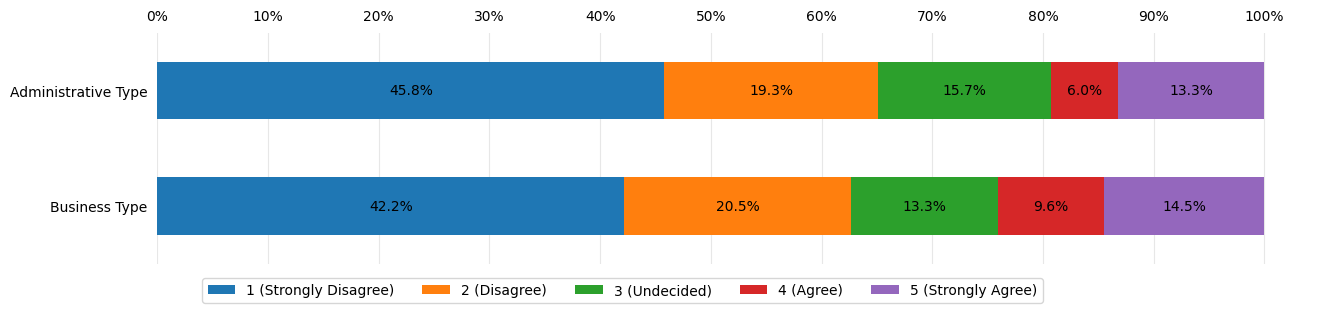

In [16]:
Slist = ['S_FilterCommercial', 'S_FilterGovernment']
measures = ['Business Type', 'Administrative Type']
columnlist = ['1 (Strongly Disagree)', '2 (Disagree)', '3 (Undecided)', '4 (Agree)', '5 (Strongly Agree)']
plot_stackbar(Slist, measures, columnlist)


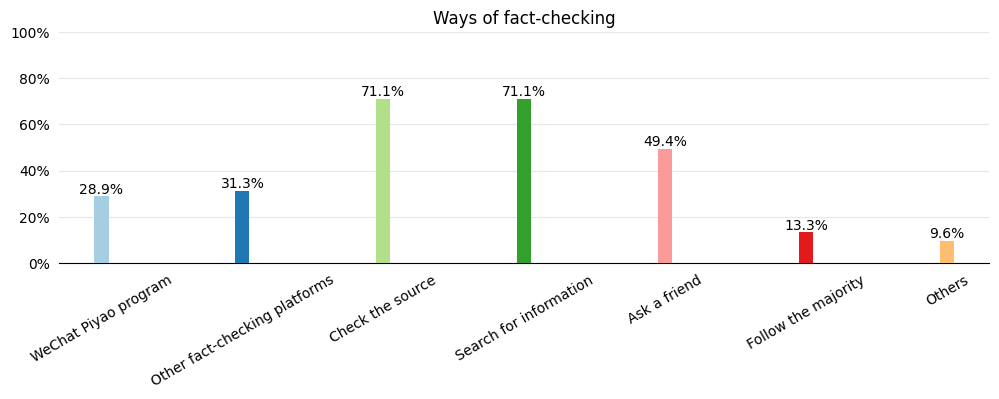

In [20]:
#measures to check information
FC_list = ['FC_WeChat', 'FC_OFC', 'FC_Source', 'FC_Search', 'FC_Friend', 'FC_Majority', 'FC_Other']
columns = ['WeChat Piyao program', 'Other fact-checking platforms', "Check the source", 'Search for information', 'Ask a friend', 'Follow the majority', 'Others']
title = "Ways of fact-checking"
plot_bar(FC_list, columns, title, 30)

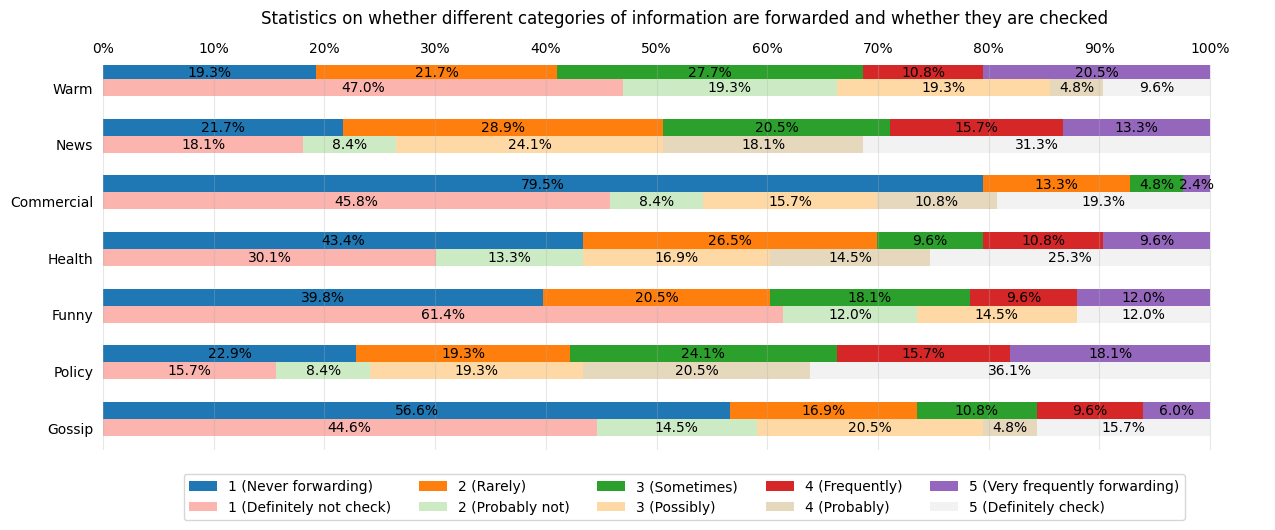

In [34]:
import itertools

def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

measures = ['Gossip', 'Policy', 'Funny', 'Health', 'Commercial', 'News', 'Warm']
FWlist = ['FW_Gossip', 'FW_Policy', 'FW_Funny', 'FW_Health', 'FW_Commercial', 'FW_News', 'FW_Warm']
FWClist = ['FWC_Gossip', 'FWC_Policy', 'FWC_Funny', 'FWC_Health', 'FWC_Commercial', 'FWC_News', 'FWC_Warm']
newdf = pd.concat([record[i] for i in FWlist], axis=1)
newdf2 = pd.concat([record[i] for i in FWClist], axis=1)
# print(newdf)
trans = newdf.T
trans2 = newdf2.T
# print(trans)
trans.index = measures
trans2.index = measures
trans.columns = ['1 (Never forwarding)', '2 (Rarely)', '3 (Sometimes)', '4 (Frequently)', '5 (Very frequently forwarding)']
trans2.columns = ['1 (Definitely not check)', '2 (Probably not)', '3 (Possibly)', '4 (Probably)', '5 (Definitely check)']
trans.fillna(0, inplace = True)
trans2.fillna(0, inplace = True)
# print(trans2)
# 显示数据标签
width = 0.3
multiplier = 0
fig, ax = plt.subplots(figsize=(15, 5), zorder=3) 
axsub1 = trans.plot.barh(stacked=True, width=width, position=-0.5, ax = ax)
axsub2 = trans2.plot.barh(stacked=True, width=width, position=0.5, ax = ax, colormap='Pastel1')
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))
handles, labels = ax.get_legend_handles_labels()
ax.legend(flip(handles, 5), flip(labels, 5), loc = 8, bbox_to_anchor=(0.5, -0.2), ncol = 5)
plt.tick_params(top=False,bottom=False,left=False,right=False, labeltop=True, labelbottom=False)
ax.xaxis.set_major_locator(MultipleLocator(0.1)) 
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.spines['bottom'].set_visible(False) 
plt.grid(axis = 'x', zorder=0, alpha = 0.3)
plt.title("Statistics on whether different categories of information are forwarded and whether they are checked", pad = 30, y = 1)
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt=lambda x: '{:.1f}%'.format(x * 100) if x > 0 else '')


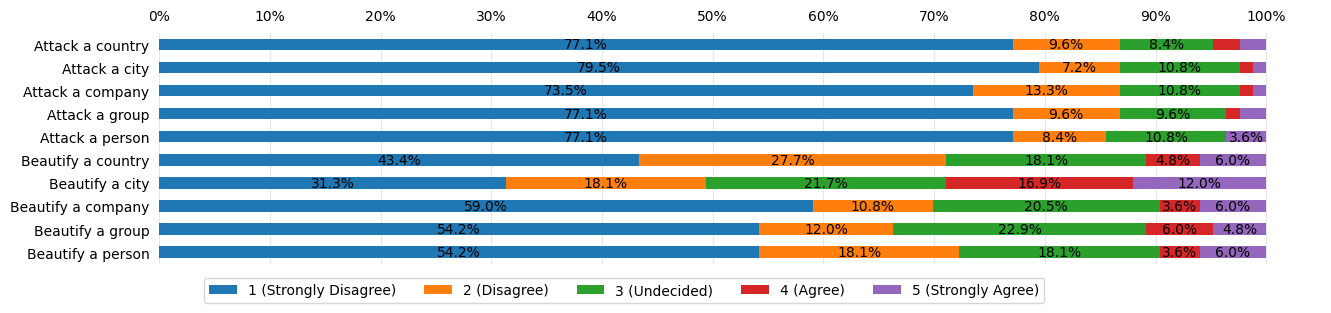

In [44]:
measures = ['Beautify a person', 'Beautify a group', 'Beautify a company', 'Beautify a city', 'Beautify a country', 'Attack a person', 'Attack a group', 'Attack a company', 'Attack a city', 'Attack a country']
Flist = ['FA_Person', 'FA_Group', 'FA_Company', 'FA_City', 'FA_Country', 'FD_Person', 'FD_Group', 'FD_Company', 'FD_City', 'FD_Country']
columnlist = ['1 (Strongly Disagree)', '2 (Disagree)', '3 (Undecided)', '4 (Agree)', '5 (Strongly Agree)']
title = 'Statistics on agreement toward different trolling army activities'

plot_stackbar(Flist, measures, columnlist)

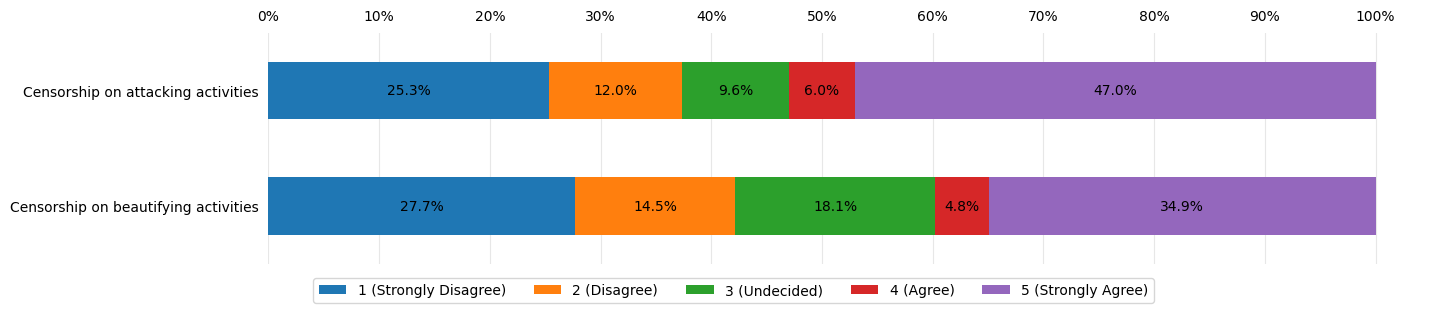

In [45]:
Flist = ['Admin_FA', 'Admin_FD']
columnlist = ['1 (Strongly Disagree)', '2 (Disagree)', '3 (Undecided)', '4 (Agree)', '5 (Strongly Agree)']
measures = ['Censorship on beautifying activities', 'Censorship on attacking activities']
plot_stackbar(Flist, measures, columnlist)

In [52]:
#define samples
group1 = data[data['Gender'] == 1]
group2 = data[data['Gender'] == 0]
for i in needed:
    # df = data[[i, 'Gender']]
    # print(df)
    #perform independent two sample t-test
    res = ttest_ind(group1[i], group2[i])
    # print(res)
    # print(res.pvalue)
    if res.pvalue < 0.05:
        print(i, res)
        print(group1[i].mean(), group1[i].std())
        print(group2[i].mean(), group2[i].std())
    # break

S_Encount Ttest_indResult(statistic=-2.003074544988082, pvalue=0.04851381780023884)
2.7017543859649122 1.4995822308789604
3.3846153846153846 1.2985198674467195
FWC_News Ttest_indResult(statistic=-2.4344592656500015, pvalue=0.01711237546810561)
3.1052631578947367 1.4962358786338732
3.923076923076923 1.2303845552696742
